## Importing Necessary Libraries

In [103]:
# EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

#Modeling
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Dataset

In [4]:
import pandas as pd
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## Exploratory Data Analysis

In [5]:
df.head()    #top 5 rows of df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()    # bottom 5 rows of df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
#number of targets in each class
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

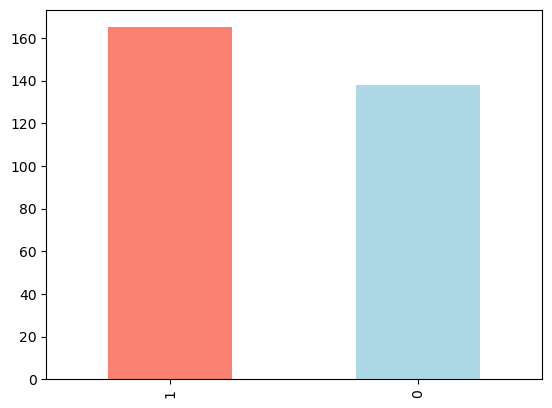

In [14]:
# plotting target value
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
#checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Comparison of feature columns with target column

###  Gender vs Heart_disease

In [18]:
#number of male and females 1-male, 0-female
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [19]:

pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


if the participant is a woman, there's a 75% chance she has heart disease.(72/96)

As for males, 45% (93/207)

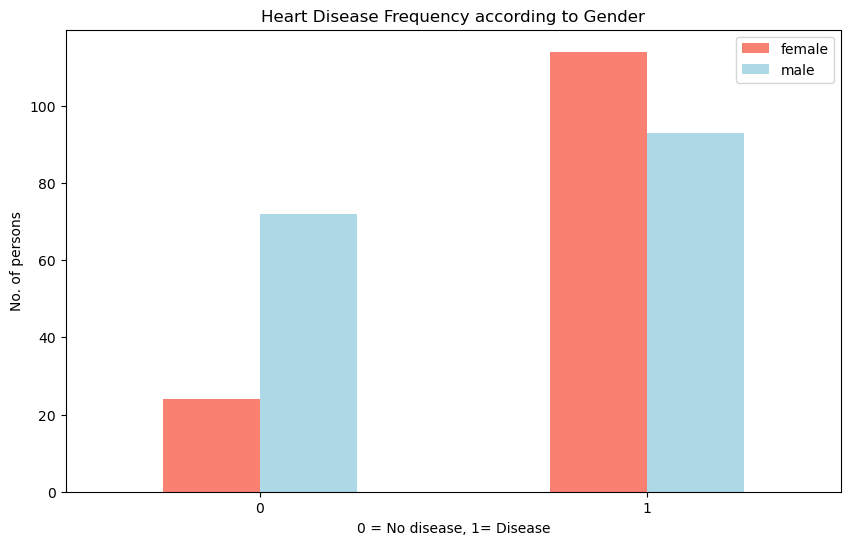

In [42]:
#visualizing
pd.crosstab(df.sex,df.target).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue']);
plt.title('Heart Disease Frequency according to Gender')
plt.xlabel('0 = No disease, 1= Disease')
plt.ylabel('No. of persons')
plt.legend(['female','male'])
plt.xticks(rotation=0);

### Age vs Max Heart Rate for Heart Disease

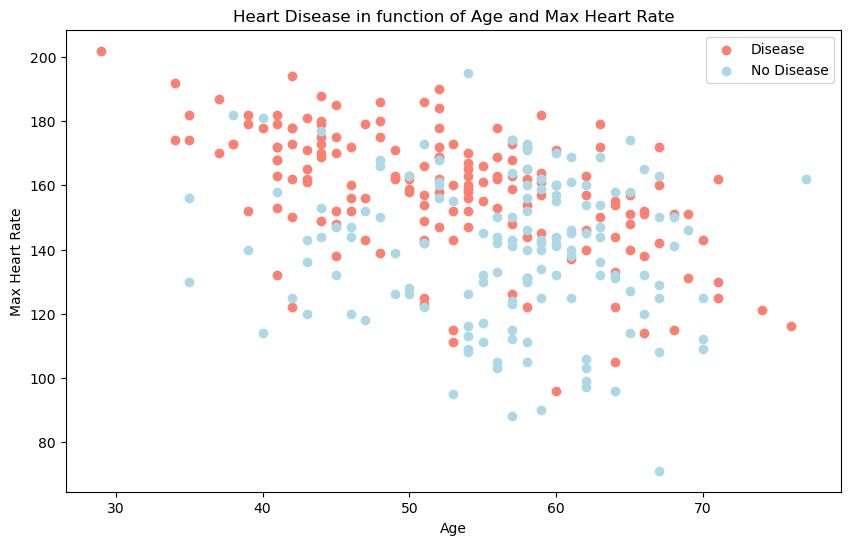

In [32]:

plt.figure(figsize=(10,6))
#positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color='salmon')
#negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color='lightblue');

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

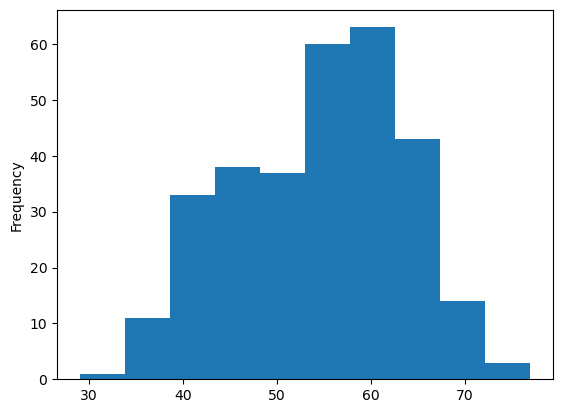

In [37]:
#distribution of age
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

In [38]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

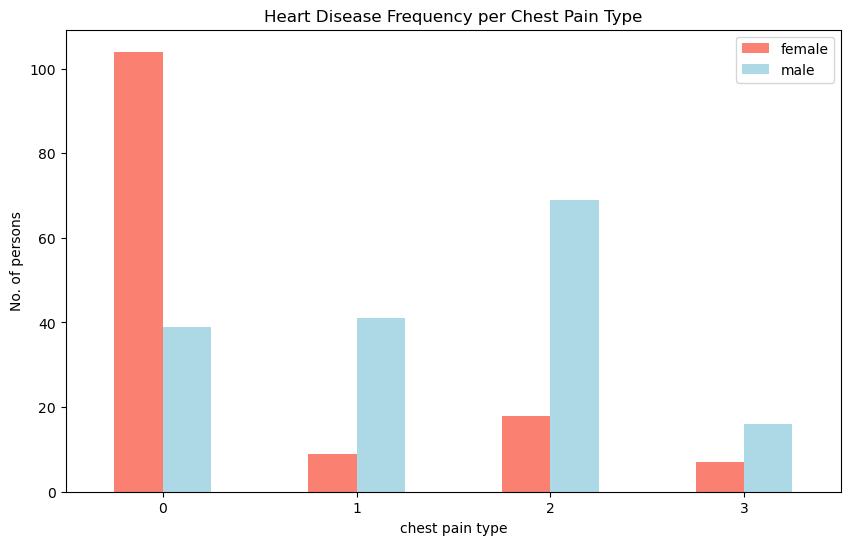

In [43]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue']);
plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('chest pain type')
plt.ylabel('No. of persons')
plt.legend(['female','male']);
plt.xticks(rotation = 0); #xaxis label vertical

## Correlation between independent variables

In [44]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


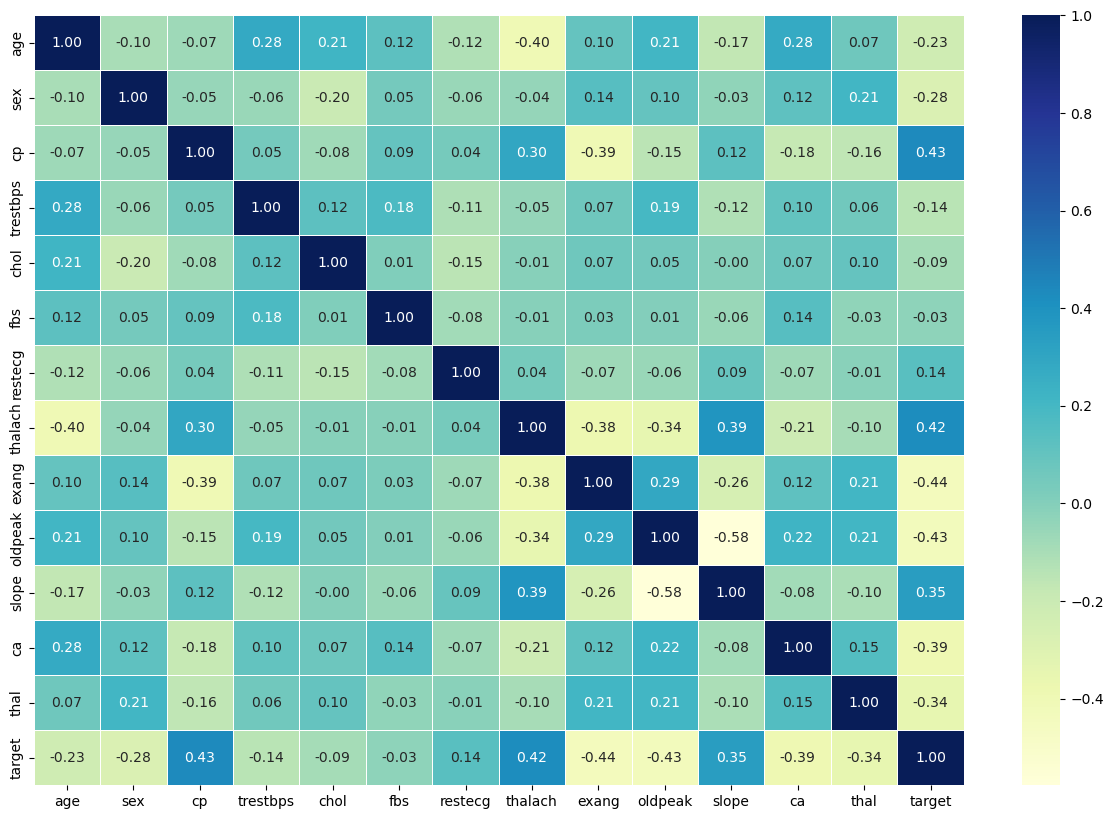

In [48]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
            fmt='.2f',
           cmap='YlGnBu');

# Modeling

In [52]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
#split into X and y
X = df.drop('target',axis=1)
y = df['target'].values

In [54]:
X                                 #features(independent variable)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [57]:
y                                  #Target variable

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [69]:
# split data into Train and Test splits
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

- choosing the right estimator https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
 
 Trying out three models
 1. Logistic Regression
 2. K-Nearest Neighbors Classification
 3. RandomForest Classification

In [73]:
#put three models in a dictionary

models = {"Logistic Regression": LogisticRegression(),
          "KNN classification" : KNeighborsClassifier(),
          "Random Forest"      : RandomForestClassifier()
         }
model_scores = {}   #dictionary to store model scores
#create a function to fit and score models

def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)

    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [76]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             y_train=y_train,
                             X_test=X_test,
                             y_test=y_test)
model_scores

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN classification': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparison 

In [81]:

compare_model = pd.DataFrame(model_scores,index=['Accuracy'])
compare_model

,Logistic Regression,KNN classification,Random Forest
Accuracy,0.885246,0.688525,0.836066


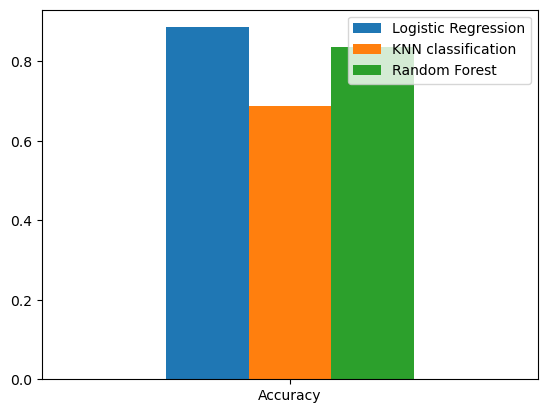

In [82]:
compare_model.plot.bar()
plt.xticks(rotation=0);

## Hyper Parameter tuning with GridSearchCV on Logistic Regression model

In [93]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True,n_jobs=-1)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [94]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [95]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [97]:
m = LogisticRegression(C =  0.23357214690901212, solver =  'liblinear')
m.fit(X_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [98]:
m.score(X_test,y_test)

0.8852459016393442

## Evaluation

In [101]:
y_pred = gs_log_reg.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [105]:
print(f'Accuracy = {accuracy_score(y_test,y_pred)}')

Accuracy = 0.8852459016393442


### Roc curve and AUC Scores

In [121]:
from sklearn.metrics import roc_curve

y_pred_proba = gs_log_reg.predict_proba(X_test)
y_prob_positive = y_pred_proba[:,1]

#calculate fpr, tpr, threshold

fpr,tpr,threshold = roc_curve(y_test,y_prob_positive)
from sklearn import metrics
roc_auc = metrics.auc(fpr, tpr)

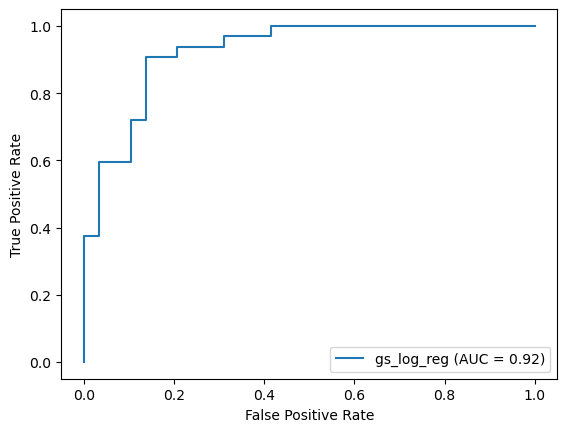

In [125]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc,estimator_name='gs_log_reg')
display.plot();

### Confusion Matrix

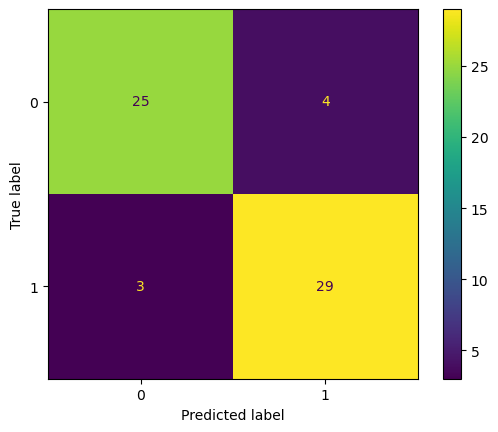

In [131]:
cm = confusion_matrix(y_test,y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gs_log_reg.classes_)
disp.plot();

### Classification Report

In [137]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Evaluation Metrics using Cross-Validation

In [138]:
# creating classifier with best parameter
clf = LogisticRegression(C =  0.23357214690901212, solver =  'liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [140]:
#cross-validated accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [142]:
# mean of cross-validated accuracy
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [143]:
# cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,X,y,scoring='precision'))
cv_precision

0.8215873015873015

In [144]:
cv_recall = np.mean(cross_val_score(clf,X,y,scoring='recall'))
cv_recall

0.9272727272727274

In [145]:
cv_f1_score= np.mean(cross_val_score(clf,X,y,scoring='f1'))
cv_f1_score

0.8705403543192143

In [149]:
#visualization
cv_metrics = pd.DataFrame({"Accuray" : cv_acc,
                          "Precision": cv_precision,
                          "Recall"   : cv_recall,
                          "F1_score" : cv_f1_score },
                         index=[0])
cv_metrics

,Accuray,Precision,Recall,F1_score
0,0.847978,0.821587,0.927273,0.87054


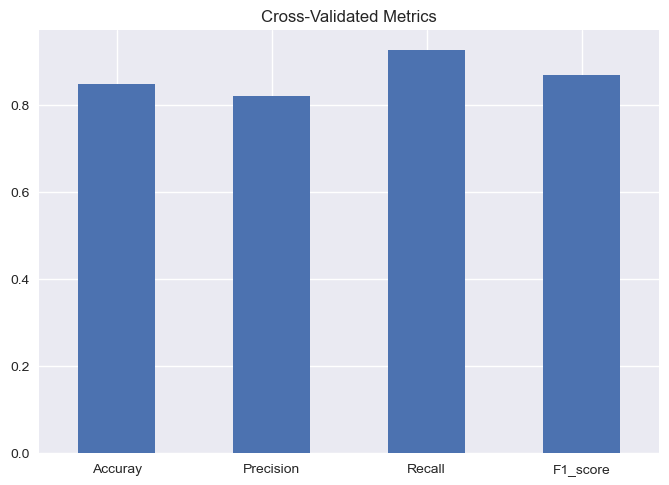

In [158]:
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False)
plt.xticks(rotation=0);

## Feature Importance

In [159]:
clf.coef_

array([[ 0.00369922, -0.90424093,  0.67472825, -0.0116134 , -0.00170364,
         0.04787688,  0.33490201,  0.02472938, -0.63120409, -0.57590965,
         0.47095149, -0.65165346, -0.69984211]])

In [160]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699221627279003,
 'sex': -0.9042409285687546,
 'cp': 0.6747282509574564,
 'trestbps': -0.01161340025062118,
 'chol': -0.0017036437710376048,
 'fbs': 0.047876877336918186,
 'restecg': 0.33490200716536156,
 'thalach': 0.024729382362283066,
 'exang': -0.6312040866990564,
 'oldpeak': -0.5759096490530667,
 'slope': 0.47095148586396174,
 'ca': -0.6516534633333719,
 'thal': -0.6998421076294032}

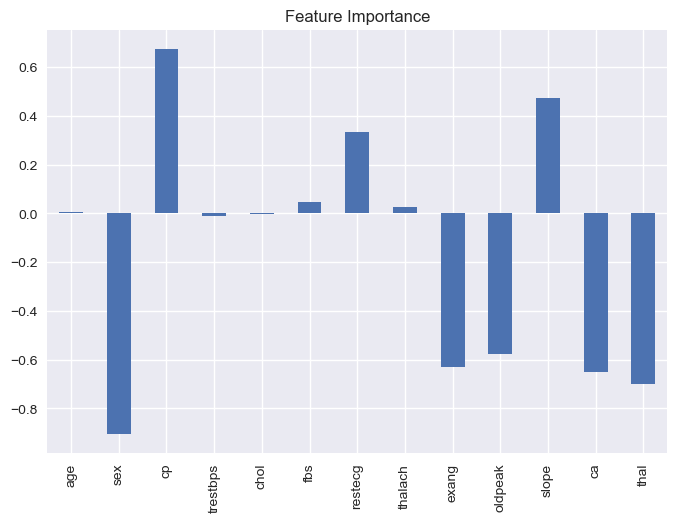

In [163]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);